In [51]:
#!pip3 install s3fs --user

     |████████████████████████████████| 65 kB 4.2 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 25.7 MB/s eta 0:00:01
     |████████████████████████████████| 9.1 MB 30.7 MB/s eta 0:00:01     |████████████████████▏           | 5.7 MB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 12.3 MB/s eta 0:00:01
     |████████████████████████████████| 161 kB 32.5 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 47.0 MB/s eta 0:00:01
     |████████████████████████████████| 262 kB 46.9 MB/s eta 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import findspark
findspark.init()

In [3]:
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
2022-10-20 13:11:49,754 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2022-10-20 13:11:51,366 WARN util.Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
2022-10-20 13:11:53,272 WARN yarn.Client: Neither spark.yarn.jars nor spark.yarn.archive is set, falling back to uploading libraries under SPARK_HOME.


In [4]:
data = spark.read.csv("hdfs:///user/ubuntu/dataym/2009/02/02.csv", )

In [5]:
data.show(5)

+--------------------+----+--------------------+----------+---------+----------+---------+---+
|                 _c0| _c1|                 _c2|       _c3|      _c4|       _c5|      _c6|_c7|
+--------------------+----+--------------------+----------+---------+----------+---------+---+
|2009-02-27 13:31:...|16.5|2009-02-27 13:31:...|-73.974938|40.762091|-74.003309|40.706195|  2|
|2009-02-13 16:54:...| 6.7|2009-02-13 16:54:...|-73.959669|40.779718|-73.976259|40.788413|  1|
|2009-02-22 22:48:...| 2.5|2009-02-22 22:48:...|         0|        0|-74.005433|40.726685|  2|
|2009-02-16 07:40:...|14.5|2009-02-16 07:40:...|-73.948872|40.807601|-73.937218|40.767366|  1|
|2009-02-27 17:39:...| 8.1|2009-02-27 17:39:...|-73.992877|40.742668|-73.983468| 40.74748|  1|
+--------------------+----+--------------------+----------+---------+----------+---------+---+
only showing top 5 rows



In [6]:
type(data)

pyspark.sql.dataframe.DataFrame

In [7]:
# data가 너무 크니 1000개로 자르기
little_data = data.limit(10000)

In [8]:
# pyspark.sql.dataframe.DataFrame to Pandas df
df = little_data.toPandas()
df.head()

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7
0,2009-02-27 13:31:21.0000003,16.5,2009-02-27 13:31:21 UTC,-73.974938,40.762091,-74.003309,40.706195,2
1,2009-02-13 16:54:52.0000006,6.7,2009-02-13 16:54:52 UTC,-73.959669,40.779718,-73.976259,40.788413,1
2,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00 UTC,0,0,-74.005433,40.726685,2
3,2009-02-16 07:40:14.0000002,14.5,2009-02-16 07:40:14 UTC,-73.948872,40.807601,-73.937218,40.767366,1
4,2009-02-27 17:39:00.000000125,8.1,2009-02-27 17:39:00 UTC,-73.992877,40.742668,-73.983468,40.74748,1


In [9]:
column_list =  ["key","fare_amount","pickup_datetime","pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude","passenger_count"]

In [10]:
df.columns = column_list

In [11]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-02-27 13:31:21.0000003,16.5,2009-02-27 13:31:21 UTC,-73.974938,40.762091,-74.003309,40.706195,2
1,2009-02-13 16:54:52.0000006,6.7,2009-02-13 16:54:52 UTC,-73.959669,40.779718,-73.976259,40.788413,1
2,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00 UTC,0,0,-74.005433,40.726685,2
3,2009-02-16 07:40:14.0000002,14.5,2009-02-16 07:40:14 UTC,-73.948872,40.807601,-73.937218,40.767366,1
4,2009-02-27 17:39:00.000000125,8.1,2009-02-27 17:39:00 UTC,-73.992877,40.742668,-73.983468,40.74748,1
...,...,...,...,...,...,...,...,...
9995,2009-02-24 18:23:00.000000169,6.5,2009-02-24 18:23:00 UTC,-73.961238,40.75665,-73.976258,40.760223,1
9996,2009-02-27 08:16:00.0000003,11.3,2009-02-27 08:16:00 UTC,-74.006757,40.730563,-73.973948,40.751045,5
9997,2009-02-27 08:44:26.0000004,6.5,2009-02-27 08:44:26 UTC,-73.973492,40.753211,-73.984299,40.742373,1
9998,2009-02-24 08:40:07.0000002,12.5,2009-02-24 08:40:07 UTC,-73.960046,40.770377,-73.981899,40.752158,1


In [12]:
df.describe()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,349,8726,8839,9103,9014,9235,6
top,2009-02-27 13:31:21.0000003,4.9,2009-02-06 18:20:00 UTC,0,0,0,0,1
freq,1,441,5,154,154,151,151,6849


In [13]:
#check 결측치
df.isnull().sum().sort_values(ascending=False)
print(df.shape)

(10000, 8)


In [14]:
#drop 결측치
df = df.drop(df[df.isnull().any(1)].index, axis = 0)

/tmp/ipykernel_6952/2820316284.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df = df.drop(df[df.isnull().any(1)].index, axis = 0)


In [15]:
df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime']  = pd.to_datetime(df['pickup_datetime'])

In [16]:
df = df.astype({'fare_amount':'float',
              'pickup_longitude':'float',
              'pickup_latitude':'float',
              'dropoff_longitude':'float',
              'dropoff_latitude':'float',
              'passenger_count':'int'},)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   key                10000 non-null  datetime64[ns]     
 1   fare_amount        10000 non-null  float64            
 2   pickup_datetime    10000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   10000 non-null  float64            
 4   pickup_latitude    10000 non-null  float64            
 5   dropoff_longitude  10000 non-null  float64            
 6   dropoff_latitude   10000 non-null  float64            
 7   passenger_count    10000 non-null  int64              
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(5), int64(1)
memory usage: 625.1 KB


In [18]:
# #fare_amount값이 0인 경우를 찾기 :2가지
# from collections import Counter
# Counter(df['fare_amount']<0)

In [19]:
#drop fare_amount가 0인경우 (요금이 0이 나온경우는 제거)
df = df.drop(df[df['fare_amount']<0].index, axis=0)
df.shape

(10000, 8)

Text(0, 0.5, 'Frequency')

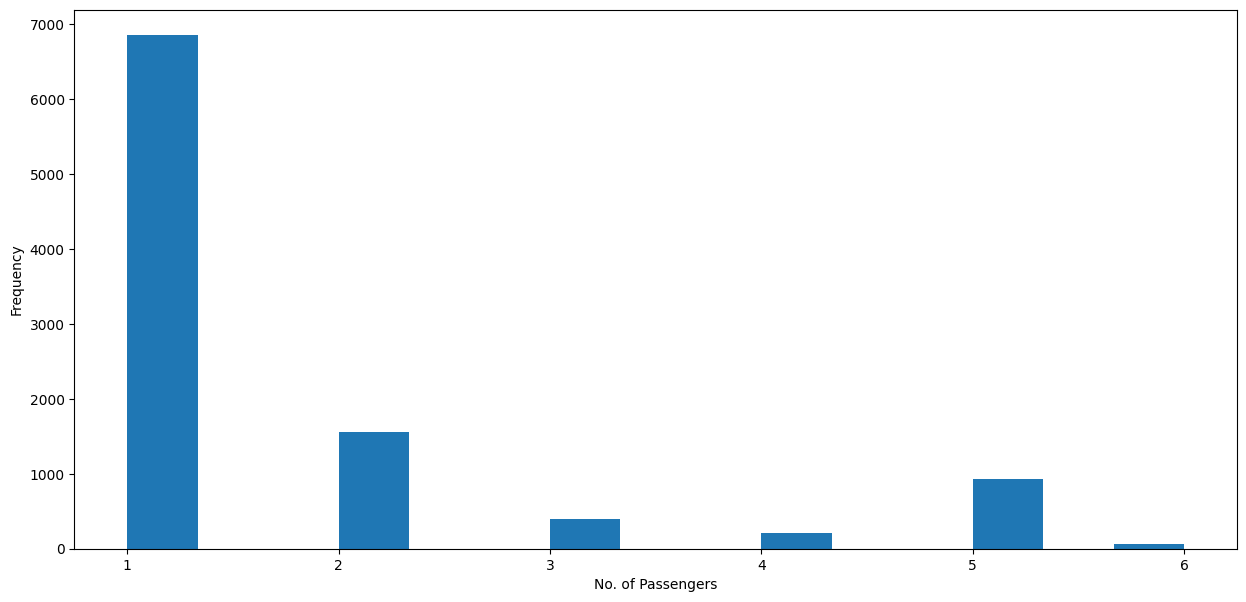

In [20]:
plt.figure(figsize=(15,7))
plt.hist(df['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

In [21]:
df.to_csv('s3://team07-data/SPARK-ETL/pyspark_ETL_2.csv', index=False)

PermissionError: Access Denied